# Lectura de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = "PROJECT_G2M6/"
df = pd.read_csv(f"{base_path}src/nombre_paquete/database/vehicles_colombia.csv")
print(f"Total de registro en el dataset: {len(df)}")
df.head()

Total de registro en el dataset: 12433


,Novedad,Marca,Clase,Codigo,HomologoCodigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,...,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,101001,NaN,2141,1.6,MT 1600CC TAXI,1380,2,...,5,0,5,0,2,Activo,GSL,4X2,0,1
1,M,AMERICAN MOTOR,CAMIONETA PASAJ.,206001,NaN,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,...,5,0,5,0,2,Activo,NaN,NaN,0,1
2,M,AMERICAN MOTOR,CAMPERO,208003,NaN,WRANGLER,4.2,MT 4200CC CAB,1100,1,...,5,0,3,1,2,Activo,NaN,4X4,0,1
3,M,AMERICAN MOTOR,CAMPERO,208004,NaN,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,...,5,0,3,1,2,Activo,NaN,4X4,0,1
4,M,AUTECO,MOTOCICLETA,317003,NaN,SUMA,80,MT 80CC 2T,75,1,...,2,0,0,0,2,Activo,GSL,2X1,0,1


In [3]:
df.columns

Index(['Novedad', 'Marca', 'Clase', 'Codigo', 'HomologoCodigo', 'Referencia1',
       'Referencia2', 'Referencia3', 'Peso', 'IdServicio', 'Servicio', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'Bcpp', 'Importado', 'Potencia', 'TipoCaja',
       'Cilindraje', 'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga',
       'Puertas', 'AireAcondicionado', 'Ejes', 'Estado', 'Combustible',
       'Transmision', 'Um', 'PesoCategoria'],
      dtype='object')

# Preprocesamiento

## Limpieza de duplicados

In [4]:
df[df.Codigo.duplicated()]

,Novedad,Marca,Clase,Codigo,HomologoCodigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,...,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria


In [5]:
df["NombreVehiculo"] = ("(" + df["Clase"] + ") " + df["Marca"] + " - " + df["Referencia1"] + " " + df["Referencia2"] + " " + df["Referencia3"])
print(f"Registros duplicados según nombre completo del vehículo: {len(df[df.NombreVehiculo.duplicated()])}")
df_clean = df[~df.NombreVehiculo.duplicated()].set_index("NombreVehiculo").drop(columns=[str(x) for x in range(1970,2018)] + ["Referencia1", "Referencia2", "Referencia3", "Codigo", "HomologoCodigo", "Servicio", "Um", "PesoCategoria", "Estado", "Bcpp"]).rename(columns={"2018": "Precio2018"})
print(f"Registros restantes (NO DUPLICADOS) tras limpieza: {len(df_clean)}")

Registros duplicados según nombre completo del vehículo: 27
Registros restantes (NO DUPLICADOS) tras limpieza: 12406


## Limpieza de datos faltantes

In [6]:
print(f"La variable 'Peso' tiene {(df_clean['Peso'] == 0).sum()} registros que pasan a ser considerados de '0' a 'Nulo'.")
df_clean['Peso'] = df_clean['Peso'].replace(0, np.nan)
print(f"La variable 'Potencia' tiene {(df_clean['Potencia'] == 0).sum()} registros que pasan a ser considerados de '0' a 'Nulo'.")
df_clean['Potencia'] = df_clean['Potencia'].replace(0, np.nan)
print(f"La variable 'Cilindraje' tiene {(df_clean['Cilindraje'] == 0).sum()} registros que pasan a ser considerados de '0' a 'Nulo'.")
df_clean['Cilindraje'] = df_clean['Cilindraje'].replace(0, np.nan)
print(f"La variable 'CapacidadPasajeros' tiene {(df_clean['CapacidadPasajeros'] == 0).sum()} registros que pasan a ser considerados de '0' a 'Nulo'.")
df_clean['CapacidadPasajeros'] = df_clean['CapacidadPasajeros'].replace(0, np.nan)
print(f"La variable 'Ejes' tiene {(df_clean['Ejes'] == 0).sum()} registros que pasan a ser considerados de '0' a 'Nulo'.")
df_clean['Ejes'] = df_clean['Ejes'].replace(0, np.nan)

La variable 'Peso' tiene 1802 registros que pasan a ser considerados de '0' a 'Nulo'.
La variable 'Potencia' tiene 1080 registros que pasan a ser considerados de '0' a 'Nulo'.
La variable 'Cilindraje' tiene 742 registros que pasan a ser considerados de '0' a 'Nulo'.
La variable 'CapacidadPasajeros' tiene 565 registros que pasan a ser considerados de '0' a 'Nulo'.
La variable 'Ejes' tiene 68 registros que pasan a ser considerados de '0' a 'Nulo'.


In [7]:
df_clean = df_clean.dropna()
df_clean.describe()

,Peso,IdServicio,Precio2018,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes
count,9563.000000,9563.000000,9.563000e+03,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000
mean,1818.760326,1.193349,8.580457e+04,0.855798,147.627627,2727.209976,4.721949,1517.171285,3.151835,0.606191,2.027502
std,1627.179133,0.394945,8.400372e+04,0.351312,90.091627,2137.137287,4.430949,4068.401431,1.697826,0.488619,0.175278
min,52.000000,1.000000,1.400000e+03,0.000000,3.000000,49.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,1092.000000,1.000000,3.600000e+04,1.000000,95.000000,1500.000000,2.000000,0.000000,2.000000,0.000000,2.000000
50%,1475.000000,1.000000,6.300000e+04,1.000000,133.000000,2156.000000,5.000000,0.000000,4.000000,1.000000,2.000000
75%,2049.500000,1.000000,1.087000e+05,1.000000,185.000000,3498.000000,5.000000,0.000000,5.000000,1.000000,2.000000
max,41000.000000,2.000000,1.750000e+06,1.000000,662.000000,15000.000000,54.000000,45000.000000,6.000000,1.000000,4.000000


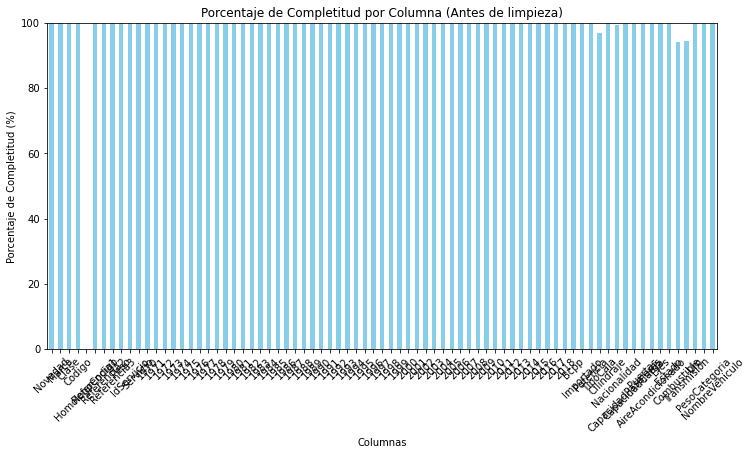

In [8]:
porcentaje_completitud = df.notnull().mean() * 100
plt.figure(figsize=(12, 6))
porcentaje_completitud.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Completitud por Columna (Antes de limpieza)')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Completitud (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

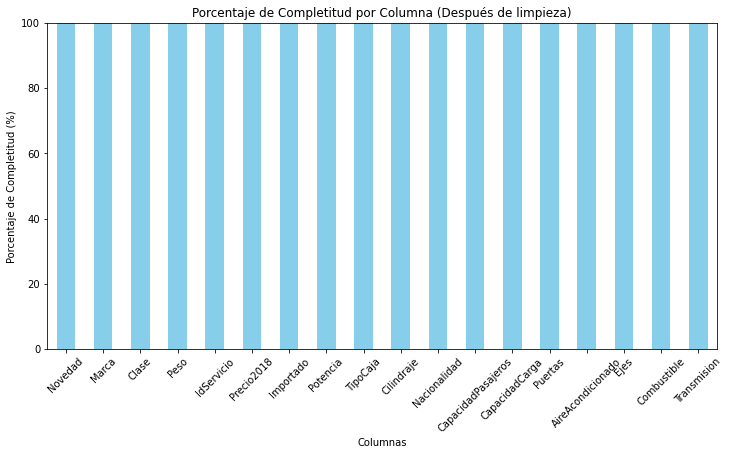

In [9]:
porcentaje_completitud = df_clean.notnull().mean() * 100
plt.figure(figsize=(12, 6))
porcentaje_completitud.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Completitud por Columna (Después de limpieza)')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Completitud (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

# EDA

In [10]:
categorical_features = ['Novedad', 'Marca', 'Clase', 'TipoCaja', 'Nacionalidad', 'Combustible', 'Transmision']
binary_features = ['IdServicio', 'Importado', 'AireAcondicionado']
discrete_features = ['CapacidadPasajeros', 'Puertas', 'Ejes']
continuous_features = ['Peso', 'Potencia', 'Cilindraje', 'CapacidadCarga']
print(f"Se están contemplando todas las columnas del dataset? - {len(categorical_features + binary_features + discrete_features + continuous_features) == len(df_clean.columns) - 1}")

Se están contemplando todas las columnas del dataset? - True


## Analisis de la variable endógena (Precio)

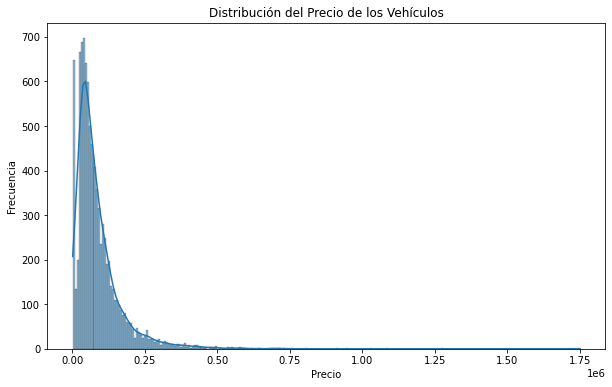

In [11]:
# Histograma de la variable precio
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Precio2018'], kde=True)
plt.title('Distribución del Precio de los Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

## Análisis de variables categóricas contra el precio

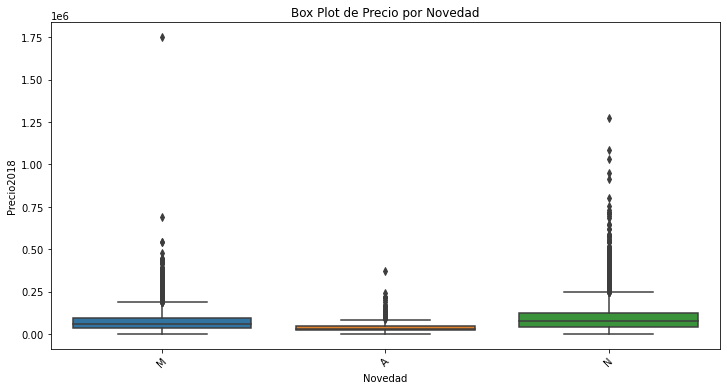

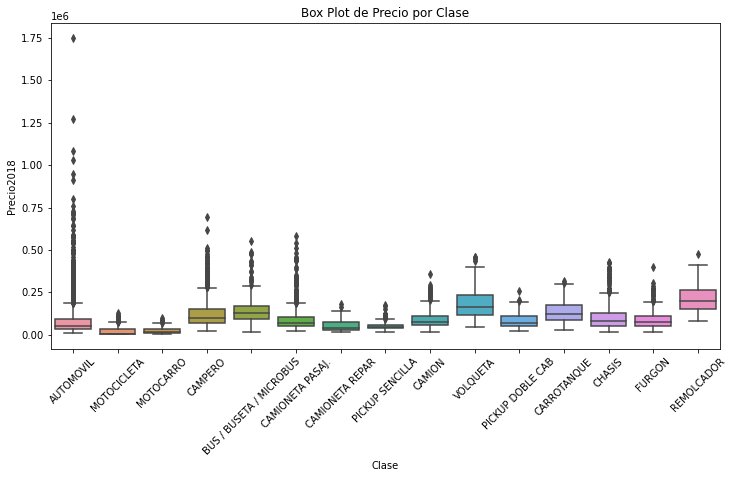

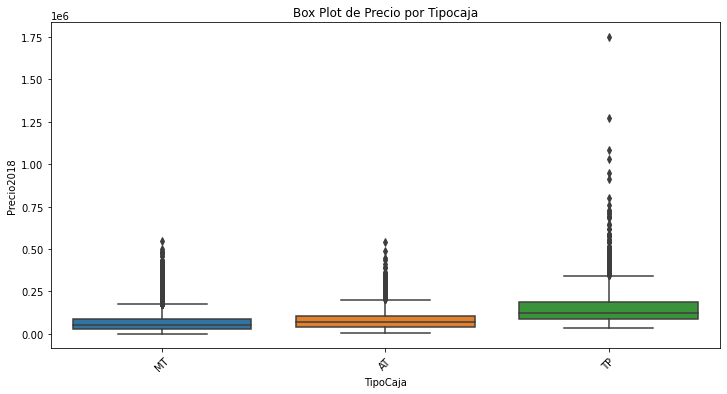

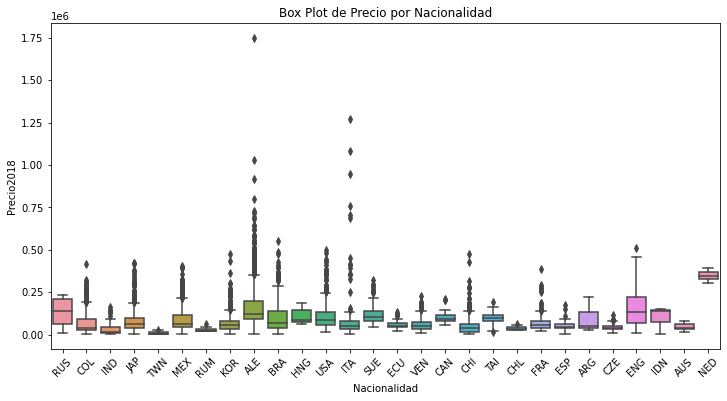

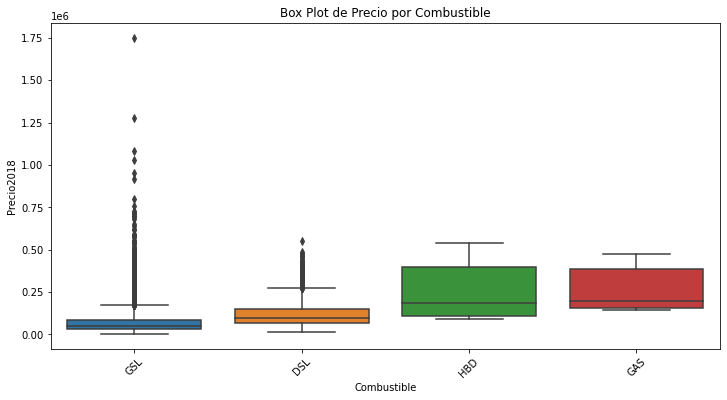

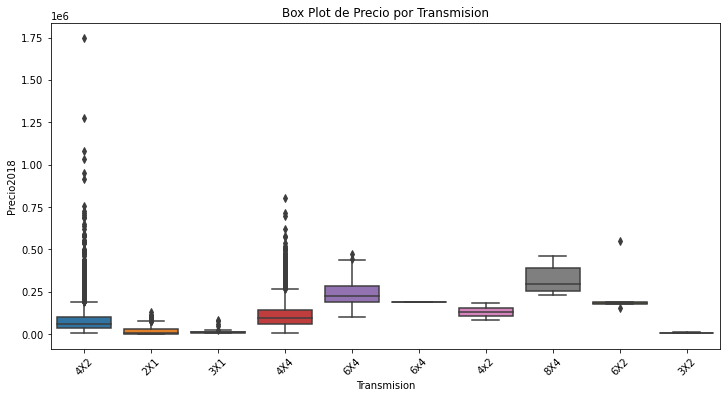

In [12]:
for feature in categorical_features:
    if feature != "Marca": # Hay demasiadas marcas, no se puede observar
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=feature, y='Precio2018', data=df_clean)
        plt.title(f'Box Plot de Precio por {feature.capitalize()}')
        plt.xticks(rotation=45)
        plt.show()

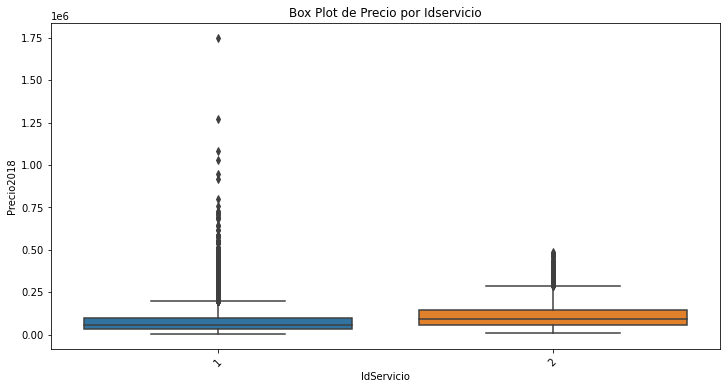

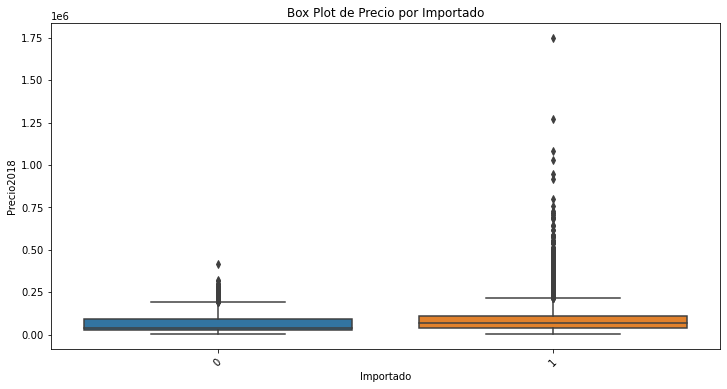

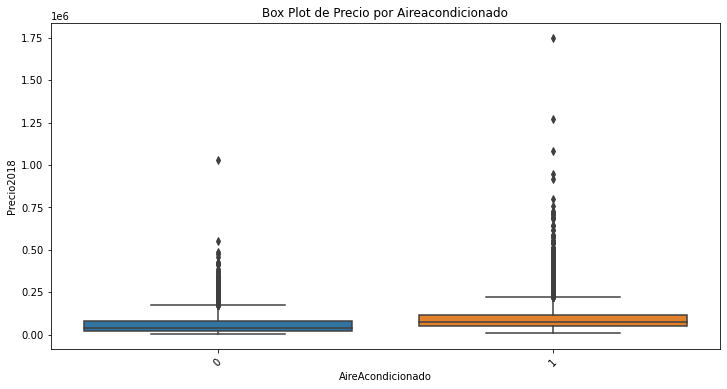

In [13]:
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Precio2018', data=df_clean)
    plt.title(f'Box Plot de Precio por {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

## Análisis de variables numéricas discretas contra el precio

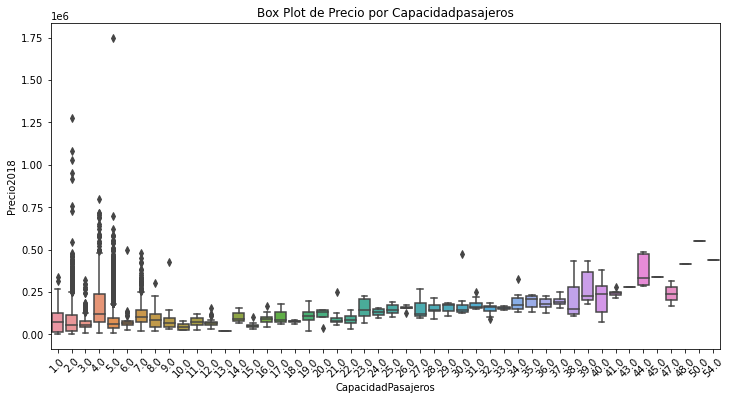

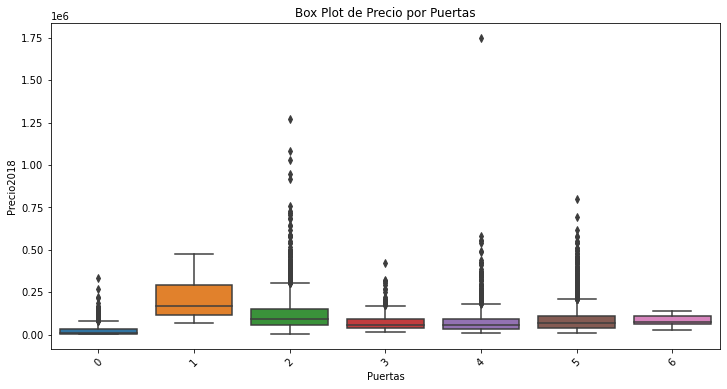

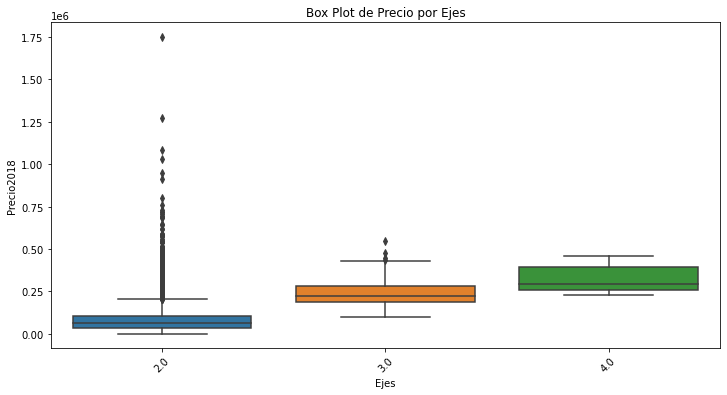

In [14]:
for feature in discrete_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Precio2018', data=df_clean)
    plt.title(f'Box Plot de Precio por {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

## Análisis de variables numéricas continuas contra el precio

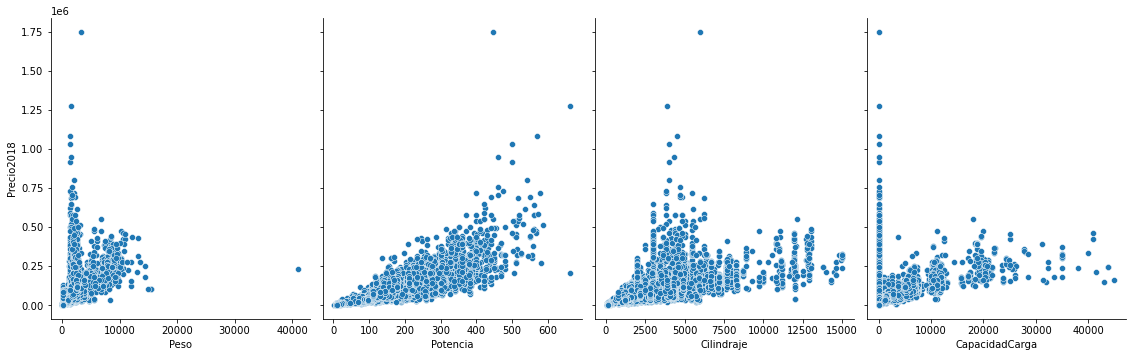

In [15]:
sns.pairplot(df_clean, x_vars=continuous_features, y_vars='Precio2018', height=5, aspect=0.8)
plt.show()

## Analisis de varianza para cada variable categórica

In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
for feature in categorical_features + binary_features:
    model = ols(f'Precio2018 ~ C({feature})', data=df_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA para {feature}:\n', anova_table)
    print('\n')

ANOVA para Novedad:
                   sum_sq      df           F        PR(>F)
C(Novedad)  2.676881e+12     2.0  197.465654  9.242850e-85
Residual    6.479856e+13  9560.0         NaN           NaN


ANOVA para Marca:
                 sum_sq      df          F  PR(>F)
C(Marca)  3.582544e+13   218.0  48.517027     0.0
Residual  3.165000e+13  9344.0        NaN     NaN


ANOVA para Clase:
                 sum_sq      df           F  PR(>F)
C(Clase)  1.206490e+13    14.0  148.496386     0.0
Residual  5.541054e+13  9548.0         NaN     NaN


ANOVA para TipoCaja:
                    sum_sq      df           F  PR(>F)
C(TipoCaja)  1.034124e+13     2.0  865.175389     0.0
Residual     5.713421e+13  9560.0         NaN     NaN


ANOVA para Nacionalidad:
                        sum_sq      df          F  PR(>F)
C(Nacionalidad)  1.454146e+13    27.0  97.013111     0.0
Residual         5.293398e+13  9535.0        NaN     NaN


ANOVA para Combustible:
                       sum_sq      df         

## Analisis de correlación de Pearson para las variables numéricas

Text(0.5, 1.0, 'Correlación de variables frente a precio del vehículo')

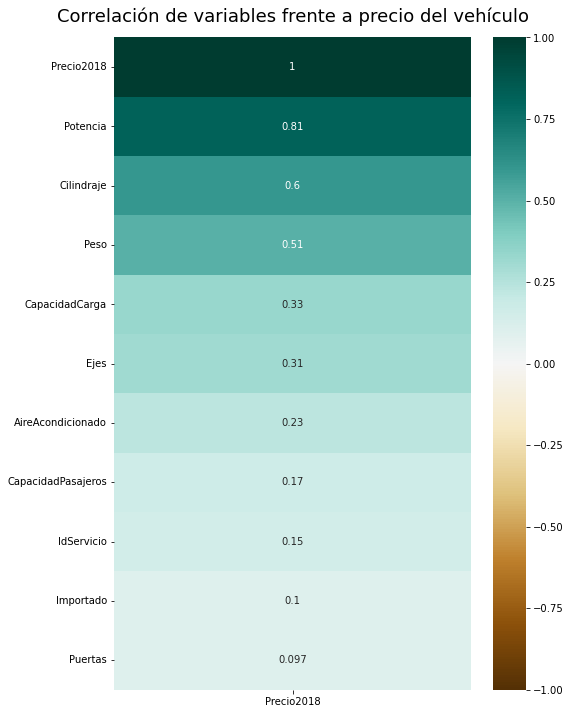

In [17]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_clean.corr()[['Precio2018']].sort_values(by='Precio2018', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de variables frente a precio del vehículo', fontdict={'fontsize':18}, pad=16)